In [1]:
# TODO make this functional and in modular functions

In [13]:
import rioxarray
import numpy as np
import matplotlib.pyplot as plt

## Open all the rasters

In [12]:


def hillshade(array, azimuth=315, angle_altitude=45):
    """Borrow hillshade

    https://github.com/uw-cryo/wv_stereo_processing/blob/54f3e82f313773e57dea8c3af5f05bb69e6b0a68/notebooks/gm_aso_dg_comparison.ipynb"""

    # Source: http://geoexamples.blogspot.com.br/2014/03/shaded-relief-images-using-gdal-python.html

    x, y = np.gradient(array)
    slope = np.pi / 2.0 - np.arctan(np.sqrt(x * x + y * y))
    aspect = np.arctan2(-x, y)
    azimuthrad = azimuth * np.pi / 180.0
    altituderad = angle_altitude * np.pi / 180.0

    shaded = np.sin(altituderad) * np.sin(slope) + np.cos(altituderad) * np.cos(
        slope
    ) * np.cos(azimuthrad - aspect)
    return 255 * (shaded + 1) / 2


In [ ]:
# %cd "/mnt/1.0_TB_VOLUME/sethv/shashank_data/SCG_EXAMPLE_STACK/"

In [2]:
# scg_inference_fn = "/mnt/1.0_TB_VOLUME/sethv/resdepth_all/deep-elevation-refinement/ResDepth/torchgeo_experiments/inference_out_v68_11325_trained_on_easton_2048x2048_SCG.tif"

scg_inference_fn = "/mnt/1.0_TB_VOLUME/sethv/resdepth_all/deep-elevation-refinement/ResDepth/torchgeo_experiments/inference_out_v96_1329_512x512_scg.tif"

In [3]:
scg_inference = rioxarray.open_rasterio(scg_inference_fn, masked=True).squeeze()

In [5]:
scg_inference.min(), scg_inference.max(), scg_inference.median(), scg_inference.mean()

(<xarray.DataArray ()>
 array(-88674.9, dtype=float32)
 Coordinates:
     band         int64 1
     spatial_ref  int64 0,
 <xarray.DataArray ()>
 array(38183.656, dtype=float32)
 Coordinates:
     band         int64 1
     spatial_ref  int64 0,
 <xarray.DataArray ()>
 array(1687.7998, dtype=float32)
 Coordinates:
     band         int64 1
     spatial_ref  int64 0,
 <xarray.DataArray ()>
 array(381.52982, dtype=float32)
 Coordinates:
     band         int64 1
     spatial_ref  int64 0)

In [6]:
scg_lidar_filled = "/mnt/1.0_TB_VOLUME/sethv/shashank_data/SCG_EXAMPLE_STACK/scg_merged_lidar_dsm_1.0m-DEM_holes_filled.tif"
scg_asp_filled = "/mnt/1.0_TB_VOLUME/sethv/resdepth_all/data/SCG_ALIGNED_STACK/scg_aligned_asp_dsm_1.0m-DEM_holes_filled.tif"

In [7]:

asp_dem_filled = rioxarray.open_rasterio(scg_asp_filled, masked=True)

In [8]:
asp_dem_filled.min()

<xarray.DataArray ()>
array(743.18146, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [9]:
asp_dem_filled.max()

<xarray.DataArray ()>
array(2703.924, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [14]:
asp_dem_hs = hillshade(asp_dem_filled[:,:1000,:1000].squeeze())

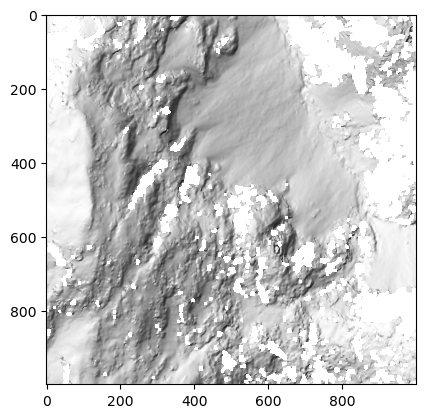

In [15]:
plt.imshow(asp_dem_hs, cmap="gray")

In [16]:
# /mnt/1.0_TB_VOLUME/sethv/resdepth_all/deep-elevation-refinement/

# Create

output_tiff = "/mnt/1.0_TB_VOLUME/sethv/resdepth_all/deep-elevation-refinement/ResDepth/torchgeo_experiments/inference_out_v68_epoch11325.tif"
input_tiff = "/mnt/1.0_TB_VOLUME/sethv/resdepth_all/data/baker2015_merged/merged_input_DSM.tif"

lidar_tiff = "/mnt/1.0_TB_VOLUME/sethv/resdepth_all/data/baker2015_merged/merged_lidar_DSM.tif"

# TODO
# bad_inference_pixel_mask # avoid using gaps/zeros from stitching boundaries in the inference output?

# train_mask # need to specify which areas were used in training, if this area was part of the model's training data
# val_mask
# landcover_tiff



In [17]:
# create processing for the breakdown

def 

SyntaxError: invalid syntax (2697478425.py, line 3)

# Metrics
- DEM metrics for each
- difference metrics
- breakdown by train/val & land cover type
- polygons
- romain Romain’s points about how to evaluate the quality of the refined output vs the initial & lidar - with his work we can see how the errors at different spatial scales change with refinement, so we expect to see fine features error reduction reflected in the smallest scales, with little/no fixes at longer scales? Generating plots like he presented today should be part of the evaluation script? Have to check what to expect at  very small spatial lag 0-5-10-20 meters and how to do that. https://xdem.readthedocs.io/en/latest/advanced_examples/plot_variogram_estimation_modelling.html#sphx-glr-advanced-examples-plot-variogram-estimation-modelling-py
Initial DEM definitely spatially correlated errors but these are probably not what we can fix with UNet since they are more about large regions where stereo DSM is too high or low. We do see errors along channels so depending how well those can be fixed, 


## Look at areas where the input DEM was valid

In [16]:

# initial_dem_fn = "/mnt/1.0_TB_VOLUME/sethv/shashank_data/SCG_EXAMPLE_STACK/scg_aligned_asp_dsm_1.0m-DEM.tif" # with holes
initial_dem_fn = "/mnt/1.0_TB_VOLUME/sethv/resdepth_all/data/SCG_ALIGNED_STACK/scg_aligned_asp_dsm_1.0m-DEM.tif" # with holes

initial_dem = rioxarray.open_rasterio(initial_dem_fn, masked=True).squeeze()

In [63]:
# scg_inference_fn = "/mnt/1.0_TB_VOLUME/sethv/resdepth_all/deep-elevation-refinement/ResDepth/torchgeo_experiments/inference_out_v68_11325_trained_on_easton_2048x2048_SCG.tif"

In [17]:
refined_dem = scg_inference
# refined_dem = rioxarray.open_rasterio(scg_inference_fn, masked=True).squeeze()

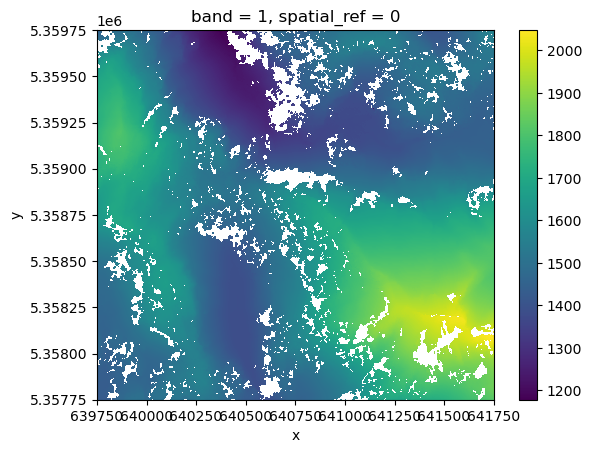

In [18]:
sample = refined_dem.where(initial_dem > 0)[:2000,:2000]
sample.plot()

In [26]:
lidar_dem_fn = "/mnt/1.0_TB_VOLUME/sethv/shashank_data/SCG_EXAMPLE_STACK/scg_merged_lidar_dsm_1.0m-DEM.tif"
lidar_dem = rioxarray.open_rasterio(lidar_dem_fn, masked=True).squeeze()
lidar_dem = lidar_dem.rio.reproject_match(scg_inference)

Text(0.5, 1.0, 'Clear problems with offsets and other artifacts at edges of refined DSM')

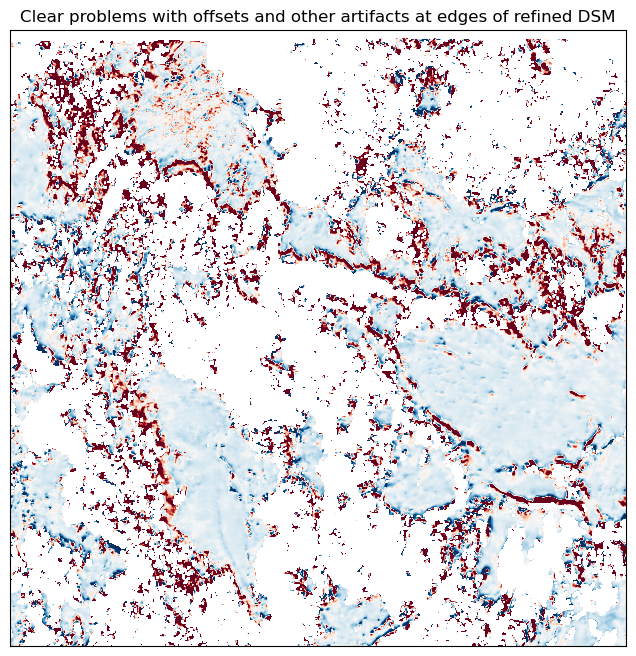

In [27]:
diff_initial_ref = initial_dem - lidar_dem
print(f"Mean absolute error: {(abs(diff_initial_ref)).mean().item()} m")
print(f"Median absolute error: {(abs(diff_initial_ref)).median().item()} m")
# median absolute error (MedAE) of 25 centimeters, mean (MAE) even higher over 1 meter?

Mean absolute error: 2.031120777130127 m
Median absolute error: 0.38238525390625 m


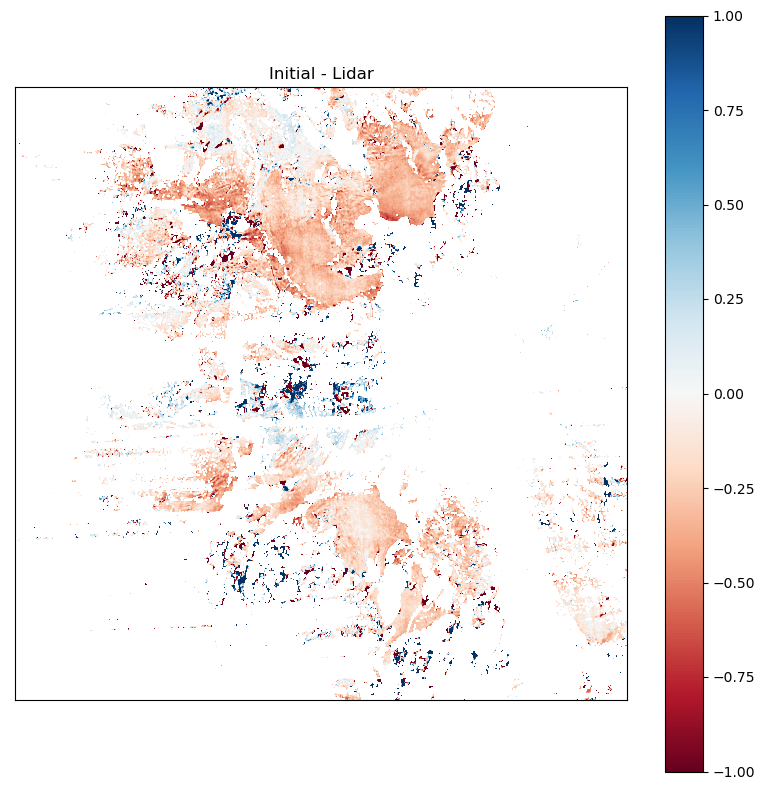

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
masked_initial_minus_lidar = (initial_dem - lidar_dem).where(initial_dem > 0)
# masked_initial_minus_lidar = masked_initial_minus_lidar
im = ax.imshow(masked_initial_minus_lidar, vmin=-1,vmax=1,cmap="RdBu")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title("Initial - Lidar")
plt.colorbar(im)
plt.tight_layout()

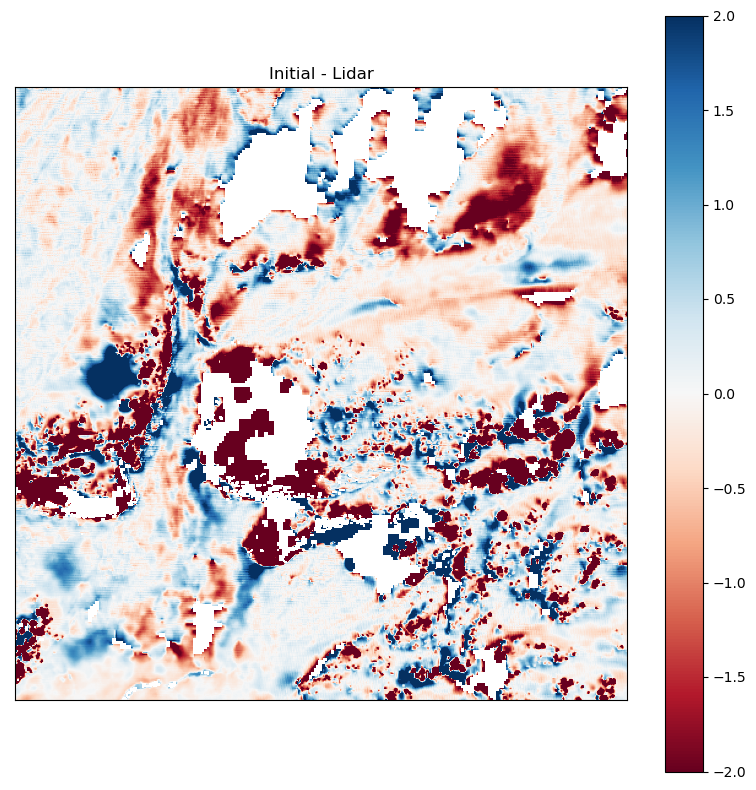

In [29]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
masked_initial_minus_lidar = (initial_dem - lidar_dem).where(initial_dem > 0)
masked_initial_minus_lidar = masked_initial_minus_lidar[2500:3000,2500:3000]#[1000:4000,1000:4000]
im = ax.imshow(masked_initial_minus_lidar, vmin=-2,vmax=2,cmap="RdBu")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title("Initial - Lidar")
plt.colorbar(im)
plt.tight_layout()

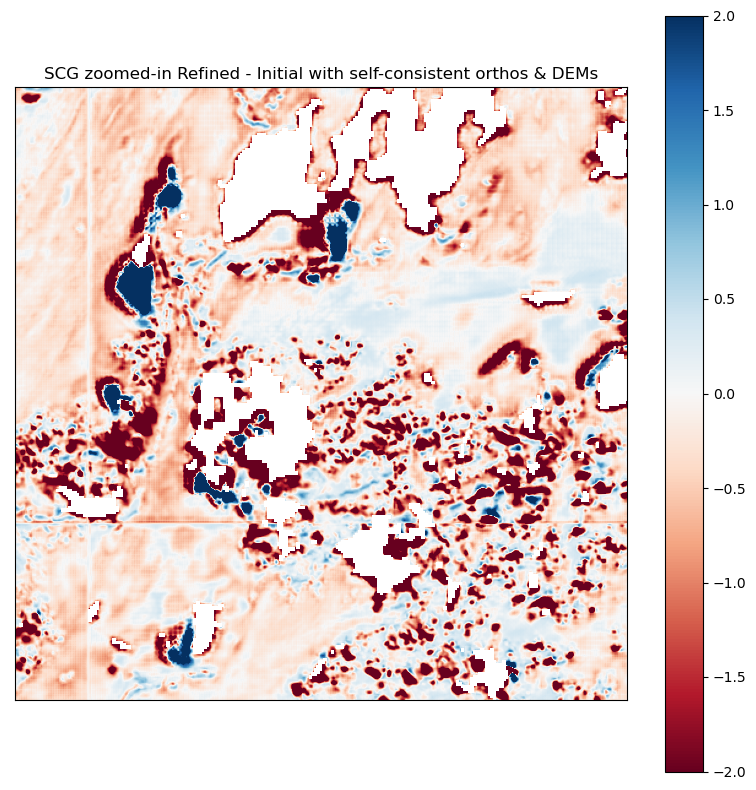

In [33]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
refined_minus_initial_small = (refined_dem - initial_dem).where(initial_dem > 0)[2500:3000,2500:3000]#[1000:4000,1000:4000]
im = ax.imshow(refined_minus_initial_small, vmin=-2,vmax=2,cmap="RdBu")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title("SCG zoomed-in Refined - Initial with self-consistent orthos & DEMs")#\nBaker-trained model is clearly adding a bias.\nAlso see offsets and other artifacts at edges of refined DSM")
plt.colorbar(im)
plt.tight_layout()

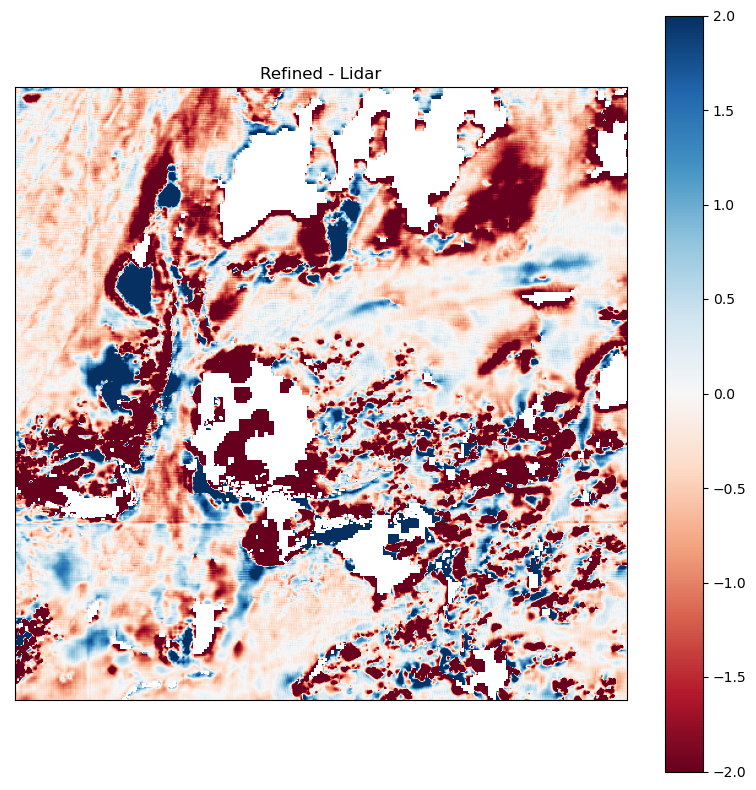

In [34]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
refined_minus_lidar_small = (refined_dem - lidar_dem).where(initial_dem > 0)[2500:3000,2500:3000]#[1000:4000,1000:4000]
im = ax.imshow(refined_minus_lidar_small, vmin=-2,vmax=2,cmap="RdBu")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title("Refined - Lidar")
plt.colorbar(im)
plt.tight_layout()

Text(0.5, 1.0, 'Refined Hillshade')

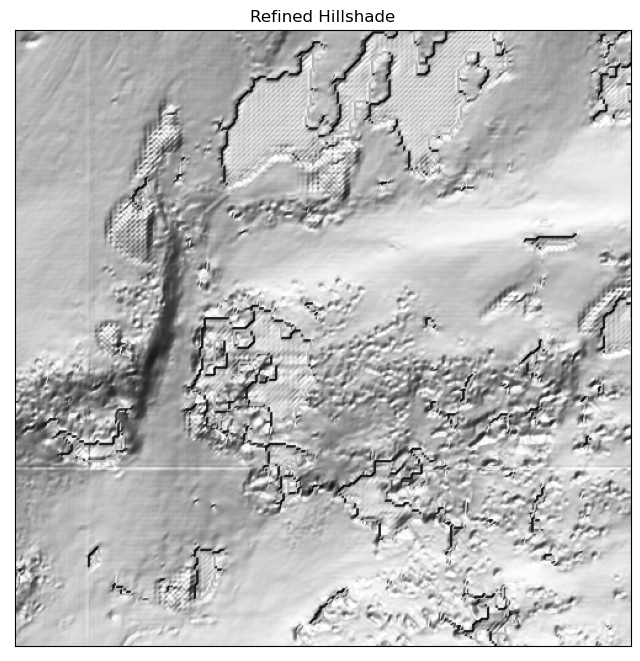

In [35]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
refined_hs = hillshade(refined_dem)[2500:3000,2500:3000]#[1000:4000,1000:4000]
ax.imshow(refined_hs, cmap="gray")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title("Refined Hillshade")

In [39]:
import numpy as np
np.mean(np.abs((refined_dem - initial_dem).where((initial_dem > 0) & (initial_dem < 4000))))

<xarray.DataArray ()>
array(1.1490735, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

In [37]:
np.mean(np.abs((lidar_dem - initial_dem).where((initial_dem > 0) & (initial_dem < 4000))))

<xarray.DataArray ()>
array(2.0311208, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

In [73]:
initial_dem_is_valid = (initial_dem > 0) & (initial_dem < 4000)

## Calculate NMAD with the full DEM before and after refinement

In [74]:
initial_dem.shape

(9001, 9001)

In [75]:
from scipy.stats import median_abs_deviation

In [76]:
mad = median_abs_deviation((initial_dem - lidar_dem).where(initial_dem_is_valid), nan_policy="omit", axis=None)
print(f"[Initial DEM vs lidar] Median Absolute Deviation: {mad}")
nmad = 1.4826 * mad # 
print(f"[Initial DEM vs lidar] NMAD: {nmad}")

[Initial DEM vs lidar] Median Absolute Deviation: 0.255859375
[Initial DEM vs lidar] NMAD: 0.379337109375


### note: with SCG bad orthoimages, expecting refinement to be worse than doing nothing (i.e. NMAD higher)

In [77]:
mad = median_abs_deviation((refined_dem - lidar_dem).where(initial_dem_is_valid), nan_policy="omit", axis=None)
print(f"[Refined DEM vs lidar] Median Absolute Deviation: {mad}")
nmad = 1.4826 * mad # 
print(f"[Refined DEM vs lidar] NMAD: {nmad}")

[Refined DEM vs lidar] Median Absolute Deviation: 0.39306640625
[Refined DEM vs lidar] NMAD: 0.58276025390625


In [78]:
fn_refdem = "/mnt/1.0_TB_VOLUME/sethv/shashank_data/20190505_south_cascade_stereo/output_COP30.tif"
refdem = rioxarray.open_rasterio(fn_refdem, masked=True)

In [79]:
refdem = refdem.squeeze()

In [80]:
lidar_dem.shape

(9001, 9001)

In [81]:
refdem.rio.bounds()

(-121.12916666666668,
 48.284861111111105,
 -120.94055555555558,
 48.40069444444444)

In [82]:
lidar_reprojected = lidar_dem.rio.reproject_match(refdem)

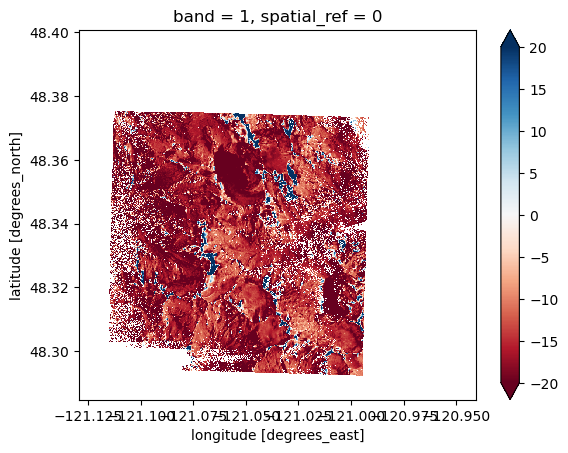

In [87]:
(lidar_reprojected - refdem).plot(vmin=-20,vmax=20, cmap="RdBu")